In [1]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 패키지 여는 단계 
# pandas 라는 패키지를 불러왔어요 / as pd (이름)
import pandas as pd
import numpy as np

In [4]:
student_score=pd.read_csv("/drive/MyDrive/Colab Notebooks/ai2DL/student_score.csv", 
                          encoding='CP949') 

In [5]:
student_score

,name,coure,score
0,홍길동,1,2
1,이지영,2,4
2,김소영,3,3
3,박지성,1,3
4,박남길,3,4
5,우진성,2,2
6,김소라,1,3
7,오인식,3,2
8,나진수,2,4
9,고길동,1,1


<h3> 학생점수 EDA </h3>

In [6]:
# 범위 지정해서 보는 방법
student_score.tail(3)

,name,coure,score
10,강진경,4,5
11,김규민,2,5
12,이명준,4,5


In [7]:
student_score = student_score.rename(columns={"coure":"강의"})

In [8]:
student_score

,name,강의,score
0,홍길동,1,2
1,이지영,2,4
2,김소영,3,3
3,박지성,1,3
4,박남길,3,4
5,우진성,2,2
6,김소라,1,3
7,오인식,3,2
8,나진수,2,4
9,고길동,1,1


In [9]:
#강의 1번 강의를 듣는 학생 -> 알아보기 
student_score[student_score["강의"] == 1]

,name,강의,score
0,홍길동,1,2
3,박지성,1,3
6,김소라,1,3
9,고길동,1,1


In [10]:
student_score[student_score["score"] == 3]

,name,강의,score
2,김소영,3,3
3,박지성,1,3
6,김소라,1,3


In [ ]:
# astype(...?)

In [11]:
# 특정 이름에 대해서 뽑고 싶을때 & --> and  | --> or 

# & : and (그리고)
# | : or  (또는)
# 나는 강의가 4번 이고 점수가 3인 학생 --> 4 & 3 (and)
# 나는 강의가 4번 이거나 점수가 3인 학생 --> 4 | 3 (or)


student_score[(student_score["강의"] == 4) | (student_score["score"] == 5)]

,name,강의,score
10,강진경,4,5
11,김규민,2,5
12,이명준,4,5


In [34]:
student_score[(student_score["name"] == '이명준') | \
              (student_score["강의"] == 4) | (student_score["score"] == 1)]

,name,강의,score
9,고길동,1,1
10,강진경,4,5
12,이명준,4,5


In [12]:
student_score[(student_score["강의"] == 4) & (student_score["score"] == 5)]

,name,강의,score
10,강진경,4,5
12,이명준,4,5


In [13]:
# 이름 : 문자형 > 영어 , 한국어, 중국어 
# 강의 : 숫자 
# 점수 : 숫자 

# 문자 --> object
# 숫자 --> int  

In [14]:
# 열마다 어떤 것이 있는지?
# dtype --> 문자, 숫자, 구분 
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13 non-null     object
 1   강의      13 non-null     int64 
 2   score   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


In [15]:
# 앞부분만 출력
student_score.head()

,name,강의,score
0,홍길동,1,2
1,이지영,2,4
2,김소영,3,3
3,박지성,1,3
4,박남길,3,4


In [16]:
# 뒷부분만 출력
student_score.tail()

,name,강의,score
8,나진수,2,4
9,고길동,1,1
10,강진경,4,5
11,김규민,2,5
12,이명준,4,5


In [17]:
student_score

,name,강의,score
0,홍길동,1,2
1,이지영,2,4
2,김소영,3,3
3,박지성,1,3
4,박남길,3,4
5,우진성,2,2
6,김소라,1,3
7,오인식,3,2
8,나진수,2,4
9,고길동,1,1


In [18]:
# 총 몇 개의 (행이) 들어가 있는지를 보는 문 
len(student_score)

13

In [19]:
# 열의 갯수를 구하는 방법 
len(student_score.columns)

3

In [37]:
# null 값이 있는지 없는지 확인 
np.sum(pd.isnull(student_score))

name     0
강의       0
score    0
dtype: int64

In [21]:
student_score.mean()

강의       2.230769
score    3.307692
dtype: float64

In [22]:
# 통계 함수 보여주는 것 (얼마나 분포해 있는지 확인)
student_score.describe()

,강의,score
count,13.000000,13.000000
mean,2.230769,3.307692
std,1.091928,1.315587
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,4.000000,5.000000


In [40]:
student_score.groupby("score").count()

,name,강의
score,,
1,1,1
2,3,3
3,3,3
4,3,3
5,3,3


In [38]:
student_score.groupby("강의").count()

,name,score
강의,,
1,4,4
2,4,4
3,3,3
4,2,2


In [24]:
student_score.groupby("강의").sum()

,score
강의,
1,9
2,15
3,9
4,10


In [25]:
student_score.groupby("score").max()

,name,강의
score,,
1,고길동,1
2,홍길동,3
3,박지성,3
4,이지영,3
5,이명준,4


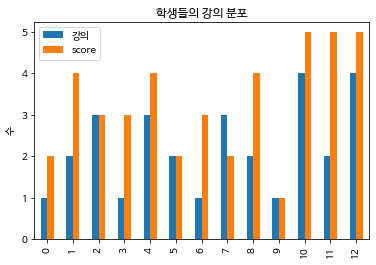

In [26]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

student_score.plot(kind='bar')
plt.title("학생들의 강의 분포")
plt.ylabel("수")
plt.show()

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

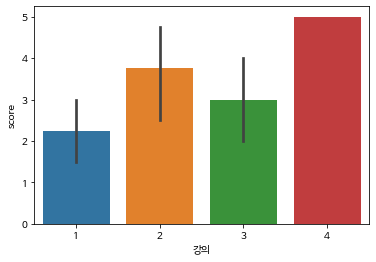

In [41]:
sns.barplot(data=student_score, x="강의", y="score")

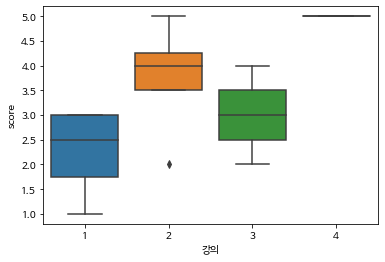

In [29]:
sns.boxplot(data=student_score, x="강의", y="score")

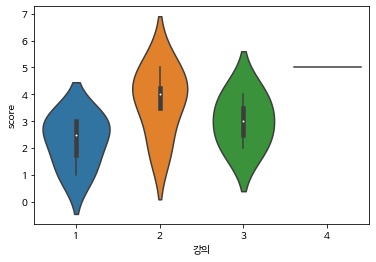

In [30]:
sns.violinplot(data=student_score, x="강의", y="score")

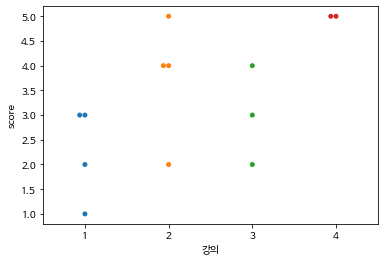

In [31]:
sns.swarmplot(data=student_score, x="강의", y="score")

In [32]:
import plotly.express as px
fig = px.histogram(student_score, x="강의")
fig.show()